In [1]:
### try to make image gray scale csv

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
image = cv2.imread('./data/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_resize = cv2.resize(gray, dsize=(224, 224), interpolation=cv2.INTER_AREA)

# can_edga = cv2.Canny(gray_resize, threshold1=50, threshold2=50)
# can_edga.astype(np.nint8)
# cv2.imshow('Canny edge', can_edga)
# cv2.imwrite('./image/Canny edge.jpg', can_edga)

# 임펄스 잡음 추가후 LoG
imp_noise = np.zeros((gray_resize.shape[0], gray_resize.shape[1]), np.uint8)
cv2.randu(imp_noise, 0, 255)
imp_noise = cv2.threshold(imp_noise, 245, 255, cv2.THRESH_BINARY)[1]
img_imp = cv2.add(gray_resize, imp_noise)

img_gf_imp = cv2.GaussianBlur(img_imp, (5, 5), 0)
lap_edge = cv2.Laplacian(img_gf_imp, cv2.CV_16S, ksize=3)
lap_edge.astype(np.uint8)
cv2.imshow('LoG image', cv2.convertScaleAbs(lap_edge)); cv2.imwrite('./image/LoG image with impulse noise.jpg', lap_edge)

imsize = gray_resize.shape
gray2 = np.float32(gray_resize)
dct = np.zeros(imsize, dtype=float)

# gray_resize.shape

# 윈도우 지우기
cv2.waitKey(0)
cv2.destroyAllWindows()

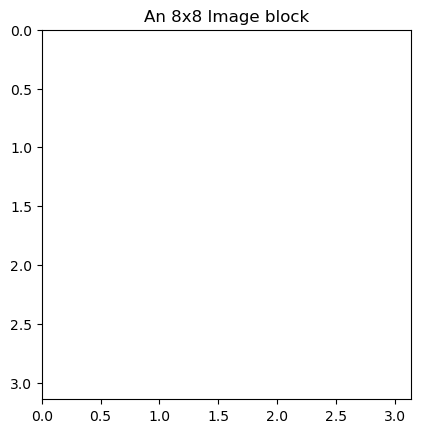

In [13]:
# 블럭사이즈: 4, 8, 16, 32 (경계값: 0.17)
blk_slc = 8
pos = 8

for i in range(0, imsize[0], blk_slc):
    for j in range(0, imsize[1], blk_slc):
        dct[i:(i+blk_slc), j:(j+blk_slc)] = cv2.dct(gray2[i:(i+blk_slc), j:(j+blk_slc)])
# dct 확인
plt.figure()
plt.imshow(gray2[pos:(pos+blk_slc), pos:(pos+blk_slc)],cmap='gray',vmax=np.max(dct)*0.01,vmin=0,extent=[0,np.pi,np.pi,0])
plt.title("An 8x8 Image block")
plt.show()

In [5]:
# len(dct.reshape(-1))

In [6]:
# colnames = [f'pixel{x}' for x in range(1, len(dct.reshape(-1))+1)]
# len(colnames)

In [7]:
# dct_df = pd.DataFrame(columns=colnames)
# dct_df

In [8]:
# dct.reshape(-1).tolist()[:5]

In [9]:
# carry_df = pd.DataFrame(dct.reshape(-1)).T
# carry_df.columns = colnames
# carry_df

In [10]:
# dct_df = pd.concat([dct_df, carry_df], ignore_index=True)
# dct_df

In [11]:
import os

In [12]:
colnames = [f'pixel{x}' for x in range(1, 32*32+1)]
len(colnames)
dct_df = pd.DataFrame(columns=colnames)
dct_df['animal'] =''
dct_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,animal


In [51]:
def create_df():
    colnames = [f'pixel{x}' for x in range(1, 32*32+1)]
    dct_df = pd.DataFrame(columns=colnames)
    dct_df['animal'] = ''
    translate = {'cane':'dog', 'cavallo':'horse', 'elefante':'elephant', 'farfalla':'butterfly', 'gallina':'chiken',
                        'gatto':'cat', 'mucca':'cow', 'pecora':'sheep', 'ragno':'spider', 'scoiattolo':'squirrel'}
    classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

    data_path = './data'

    for animal in classes:
        carry_df = pd.DataFrame(columns=colnames)
        file_list = os.listdir(data_path + '/' + animal)

        for i in file_list:
            print(data_path+'/'+animal+'/'+i)
            image = cv2.imread(data_path+'/'+animal+'/'+i, cv2.IMREAD_COLOR)
            gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            gray_resize = cv2.resize(gray, dsize=(32, 32), interpolation=cv2.INTER_AREA)
            imsize = gray_resize.shape
            gray2 = np.float32(gray_resize)
            dct = np.zeros(imsize, dtype=float)
            
            # Canny edge
            # can_edga = cv2.Canny(gray_resize, threshold1=50, threshold2=50)
            # can_edga.astype(np.uint8)

            # # 임펄스 잡음 추가후 LoG
            # imp_noise = np.zeros((gray_resize.shape[0], gray_resize.shape[1]), np.uint8)
            # cv2.randu(imp_noise, 0, 255)
            # imp_noise = cv2.threshold(imp_noise, 32, 32, cv2.THRESH_BINARY)[1]
            # img_imp = cv2.add(gray_resize, imp_noise)

            # img_gf_imp = cv2.GaussianBlur(img_imp, (5, 5), 0)
            # lap_edge = cv2.Laplacian(img_gf_imp, cv2.CV_16S, ksize=3)
            
            # 블럭사이즈: 4, 8, 16, 32 (경계값: 0.17)
            blk_slc = 8
            # pos = 256
            for i in range(0, imsize[0], blk_slc):
                for j in range(0, imsize[1], blk_slc):
                    dct[i:(i+blk_slc), j:(j+blk_slc)] = cv2.dct(gray2[i:(i+blk_slc), j:(j+blk_slc)])
                    dct.astype(np.uint8)
            
            image_df = pd.DataFrame(dct.reshape(-1)).T
            # image_df = pd.DataFrame(can_edga.reshape(-1)).T
            # image_df = pd.DataFrame(lap_edge.reshape(-1)).T
            image_df.columns = colnames

            carry_df = pd.concat([carry_df, image_df], ignore_index=True)
        carry_df['animal'] = translate[animal]


        dct_df = pd.concat([dct_df, carry_df], ignore_index=True)
    return dct_df

In [52]:
dct_df = create_df()

./data/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
./data/cane/OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg
./data/cane/OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg
./data/cane/OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg
./data/cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg
./data/cane/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg
./data/cane/OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg
./data/cane/OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg
./data/cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg
./data/cane/OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg
./data/cane/OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg
./data/cane/OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg
./data/cane/OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg
./data/cane/OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg
./data/cane/OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg
./data/cane/OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg
./data/cane/OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg
./data/cane/OIP--9pxEn5HUPsqA38ao3O7TgHaGV.jpeg
./data/cane/OIP--AzXmxzRD9y3THnVByTtLwHaG5.jpeg
./data/cane/OIP--BKXxWj6jk2y8_PQbxmJ0gHaE9.jpeg
./data/cane/OIP--BUglHhzleeaUXxOXNbgRQHaEK.j

In [53]:
dct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26179 entries, 0 to 26178
Columns: 1025 entries, pixel1 to animal
dtypes: object(1025)
memory usage: 204.7+ MB


In [54]:
dct_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,animal
0,0,0,0,255,0,0,255,0,255,0,...,0,255,0,0,0,0,0,0,0,dog
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dog
2,0,0,0,255,0,0,0,0,0,255,...,0,0,255,0,0,0,0,0,0,dog
3,0,0,0,0,0,0,0,255,0,0,...,0,0,0,255,255,0,255,0,0,dog
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dog


In [55]:
dct_df['animal'].value_counts()

animal
dog          4863
spider       4821
chiken       3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: count, dtype: int64

In [56]:
# dct_df.to_csv(r'F:/dct_image.csv', index=False)
# dct_df.to_csv('dct_image.csv', index=False)
dct_df.to_csv('canny_edge_image.csv', index=False)
# ct_df.to_csv('noise_log_edge_image.csv', index=False)

In [57]:
dct_df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel1016', 'pixel1017', 'pixel1018', 'pixel1019', 'pixel1020',
       'pixel1021', 'pixel1022', 'pixel1023', 'pixel1024', 'animal'],
      dtype='object', length=1025)